
# Task 1. Data integration

## 1. Introduction.

In this task, we are required to add the following attributes to the housing dataset:
1. Suburb
2. train_station_id
3. distance_to_train_stat
4. travel_min_to_CBD
5. over_priced?
6. crime_A_average
7. crime_B_average
8. crime_C_average

### 1.0 Load data and sanity check 
Before integrating the data, we first perform a sanity check on the original data.

In [1]:
# import library
import pandas as pd
# Load file into dataframe
df = pd.read_csv('29481929.csv')
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770


Check for duplicated rows.

In [2]:
df[df.duplicated()]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
82,ID348177156,1 Belvoir Gdns,4,h,750000.0,8/07/2017,2.0,2.0,655.0,64.0,-37.79571,144.76656
105,ID771277960,5/40 Woorayl St,2,u,430000.0,15/07/2017,1.0,1.0,2048.0,59.0,-37.88642,145.05979
153,ID281353307,178 Raglan St,2,h,920000.0,16/04/2016,2.0,2.0,516.0,84.0,-37.74970,145.01100
248,ID494146776,145 Shaftesbury Pde,3,h,1195000.0,8/04/2017,1.0,2.0,463.0,89.0,-37.75930,144.98850
332,ID400157080,1 Jordan St,2,h,1315000.0,24/09/2016,1.0,2.0,554.0,89.0,-37.77150,144.94260
333,ID728608312,67 Halsey Rd,3,h,510000.0,29/04/2017,1.0,1.0,488.0,59.0,-37.71910,144.88570
334,ID413981318,93 Arundel Av,3,h,901000.0,23/09/2017,1.0,2.0,695.0,21.0,-37.69618,145.01289
336,ID740924908,58 Station St,1,h,964000.0,17/06/2017,1.0,0.0,85.0,4.0,-37.83710,144.93859
405,ID264457087,129 Separation St,3,h,980000.0,19/11/2016,1.0,0.0,279.0,22.0,-37.77000,145.00490
448,ID596792879,7 Allawah Cl,3,h,770000.0,23/09/2017,1.0,4.0,533.0,57.0,-37.98433,145.17041


The above records have to be removed since they are redundant.

In [3]:
# drop duplicated rows
df = df.drop_duplicates()

Check for null.

In [4]:
df[df.isnull().any(axis=1)]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
421,ID703111186,85 Turner St,2,h,1480000.0,3/12/2016,1.0,1.0,202.0,NaN,-37.7996,144.9984


Record 421 has no value for age, I just replace the null with the mean of all age.

In [5]:
df['Age'].fillna((df['Age'].mean()), inplace = True)
df.loc[421]

ID             ID703111186
Address       85 Turner St
Rooms                    2
Type                     h
Price             1.48e+06
Date             3/12/2016
Bathroom                 1
Car                      1
Landsize               202
Age                54.3809
Lattitude         -37.7996
Longtitude         144.998
Name: 421, dtype: object

### 1.1 Suburb

In [6]:
# import library
import shapefile
# read shape file
shape_file = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.shp")
# retrieve all the records in the shape file
shapeRecs = shape_file.records()
# retrieve shape in the shape file
shapes = shape_file.shapes()

Let's look at the structure for each record, the 7th attribute is the suburb name, which is what we need.

In [7]:
shapeRecs[0]

Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']

Extract all the suburb name.

In [8]:
suburb_list = []
# retrieve the suburb name
for i in shapeRecs:
    suburb_list.append(i[6])

The point attribute contains all the vertice for each suburb.

In [9]:
shapes[0].points

[(141.74552399, -35.07228701),
 (141.74552471, -35.07201624),
 (141.74748471, -35.06367123),
 (141.74909525, -35.05681288),
 (141.74917403, -35.05647197),
 (141.75887404, -35.05225699),
 (141.77005396, -35.04914101),
 (141.77057401, -35.04899703),
 (141.76823304, -35.04349501),
 (141.76757096, -35.04270197),
 (141.76709398, -35.03982199),
 (141.76544215, -35.03808514),
 (141.76547768, -35.03782986),
 (141.76408494, -35.03523684),
 (141.76398063, -35.03505673),
 (141.76387633, -35.03487661),
 (141.75923139, -35.02629546),
 (141.77479178, -35.02631526),
 (141.77477947, -35.02789069),
 (141.79121543, -35.02632192),
 (141.79143466, -35.02629765),
 (141.79143596, -35.04874003),
 (141.79351097, -35.04729598),
 (141.79428796, -35.04709498),
 (141.79636183, -35.04970131),
 (141.79864596, -35.05329199),
 (141.79782903, -35.05527899),
 (141.79795996, -35.056872),
 (141.79605705, -35.05895805),
 (141.79644599, -35.06340397),
 (141.79743197, -35.06573301),
 (141.79758596, -35.06874604),
 (141.7995

In [10]:
# create a dictionary in which the key is the suburb name and the value is a list of all the boundary points for that suburb
sub_coordinate = {}
for i in range(len(suburb_list)):
    sub_coordinate[suburb_list[i]] = shapes[i].points

Determine which suburb the property belongs to by checking whether the cooridnate is inside a polygon (suburb).

In [11]:
# import library
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# empty list to store result
suburb = []

# check if the coordinates of the property is inside a suburb
for index, row in df.iterrows():
    point = Point(row['Longtitude'], row['Lattitude'])
    for key, val in sub_coordinate.items():
        polygon = Polygon(val)
        if polygon.contains(point):
            suburb.append(key)
            break

In [12]:
df['Suburb'] = suburb
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD


### 2. train_station_id
### 3. distance_to_train_stat

The GTFS dataset contains information of all public transport (bus, tram and train) in Victoria. The first thing we need to do is to find out which dataset belongs to train services. This can be done by inspecting the routes file in each dataset. Secondly, the stops file contains all the stops for that type of service, we will concatenate all the stops file that belongs to train service and loop over each stop to find out the closest train station for each property.

After inspecting individual routes file, dataset 1,2,5,10 are train service data. 1 and 5 are regional train, 2 is metropolitan train and 10 is inter-state train. We will not consider inter_state train in this case. We will now load this csv files in a dataframe.

In [13]:
# read csv
df_1_stop = pd.read_csv('stops-1.txt')
df_2_stop = pd.read_csv('stops-2.txt')
df_5_stop = pd.read_csv('stops-5.txt')

First, we need to ensure that all three types of trains goes to Souther Cross.

In [14]:
# helper function to determine if that type of train goes to Southern Cross.
def if_southern_cross(df):
    for index, row in df.iterrows():
        if 'Southern Cross Railway' in row['stop_name']:
            return True
    
    return False

In [15]:
if_southern_cross(df_1_stop)

True

In [16]:
if_southern_cross(df_2_stop)

True

In [17]:
if_southern_cross(df_5_stop)

False

Type 5 does not go to Southern Cross, therefore, we only need to consider Type 1 (regional) and Type 2 (metropolitan) train.

In [18]:
# add train type column
df_2_stop['train_type'] = 2
df_1_stop['train_type'] = 1
# concatenate the two dataframe
df_stop = pd.concat([df_2_stop, df_1_stop], axis = 0).reset_index(drop=True)
df_stop.head()

,stop_id,stop_name,stop_lat,stop_lon,train_type
0,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319,2
1,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922,2
2,19827,Stony Point Railway Station (Crib Point),-38.374235,145.221837,2
3,19828,Crib Point Railway Station (Crib Point),-38.366123,145.204043,2
4,19829,Morradoo Railway Station (Crib Point),-38.354033,145.189602,2


Now, we have to check whether the station has train going to Southern Cross on weekday 0700-0930. We first need to determine the station id for southern cross.

In [19]:
for index, row in df_1_stop.iterrows():
    if 'Southern Cross' in row['stop_name']:
        print(index)

7


In [20]:
df_1_stop.loc[7]

stop_id                                                 20043
stop_name     Southern Cross Railway Station (Melbourne City)
stop_lat                                             -37.8183
stop_lon                                              144.953
train_type                                                  1
Name: 7, dtype: object

In [21]:
for index, row in df_2_stop.iterrows():
    if 'Southern Cross' in row['stop_name']:
        print(index)

210


In [22]:
df_2_stop.loc[210]

stop_id                                                 22180
stop_name     Southern Cross Railway Station (Melbourne City)
stop_lat                                             -37.8179
stop_lon                                              144.951
train_type                                                  2
Name: 210, dtype: object

Stop 20043 is the stop for regional service and stop 22180 is the stop for metropolitan service.

Next, we need the stop time file (to get the departure time and arrival time) and also the trip file (to determine which services are weekday service). We will work on Type 1 and Type 2 seperately.

In [23]:
# load data into dataframe
df_2_stoptime = pd.read_csv('stop_times-2.txt')
df_2_trip = pd.read_csv('trips-2.txt')

# merge dataframe base on trip_id
df_2_merge = pd.merge(df_2_stoptime, df_2_trip, on ='trip_id')

df_2_merge.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
0,9117.T5.2-ALM-A-mjp-1.1.H,05:21:00,05:21:00,19853,1,NaN,0,0,0.000000,2-ALM-A-mjp-1,T5,2-ALM-A-mjp-1.1.H,Alamein,0
1,9117.T5.2-ALM-A-mjp-1.1.H,05:24:00,05:24:00,19852,2,NaN,0,0,1506.610171,2-ALM-A-mjp-1,T5,2-ALM-A-mjp-1.1.H,Alamein,0
2,9117.T5.2-ALM-A-mjp-1.1.H,05:25:00,05:25:00,19851,3,NaN,0,0,1992.788001,2-ALM-A-mjp-1,T5,2-ALM-A-mjp-1.1.H,Alamein,0
3,9117.T5.2-ALM-A-mjp-1.1.H,05:27:00,05:27:00,19850,4,NaN,0,0,3020.805604,2-ALM-A-mjp-1,T5,2-ALM-A-mjp-1.1.H,Alamein,0
4,9117.T5.2-ALM-A-mjp-1.1.H,05:29:00,05:29:00,19849,5,NaN,0,0,3968.143881,2-ALM-A-mjp-1,T5,2-ALM-A-mjp-1.1.H,Alamein,0


Now we have to determine which service is weekday service, this can be done by examining the calendar file.

Weekday service has 1 from Monday to Friday and 0 on Saturday and Sunday.

In [24]:
df_2_calendar = pd.read_csv('calendar-2.txt')
df_2_calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T5,0,0,0,1,0,0,0,20190509,20190509
1,UJ,0,0,0,0,0,0,1,20190510,20190512
2,T2,0,0,0,0,0,1,0,20190510,20190512
3,T6,0,0,0,0,1,0,0,20190510,20190512
4,T5_1,1,1,1,1,0,0,0,20190513,20190516


In [25]:
df_2_calendar[(df_2_calendar['monday'] == 1) &(df_2_calendar['tuesday'] == 1) &
              (df_2_calendar['wednesday'] == 1) &(df_2_calendar['thursday'] == 1) &(df_2_calendar['friday'] == 1)&
              (df_2_calendar['saturday'] == 0) & (df_2_calendar['sunday'] == 0)]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
11,T0,1,1,1,1,1,0,0,20190524,20190810


Service id T0 indicates that service is a weekday service.

In [26]:
df_2_merge = df_2_merge[(df_2_merge['service_id'] == 'T0')]
# change departure time and arrival time to datetime object
df_2_merge['departure_time'] = pd.to_datetime(df_2_merge['departure_time'], errors='coerce')
df_2_merge['arrival_time'] = pd.to_datetime(df_2_merge['arrival_time'], errors='coerce')
# drop unncessary columns
df_2_merge = df_2_merge.drop(columns = ['stop_headsign','pickup_type','drop_off_type'])

The same operation will be done for regional train service (type 1).

In [27]:
# load data into dataframe
df_1_stoptime = pd.read_csv('stop_times-1.txt')
df_1_trip = pd.read_csv('trips-1.txt')

# merge dataframe base on trip_id
df_1_merge = pd.merge(df_1_stoptime, df_1_trip, on ='trip_id')

df_1_merge.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000,1-V08-A-mjp-1,UR,1-V08-A-mjp-1.1.H,Melbourne,0
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026,1-V08-A-mjp-1,UR,1-V08-A-mjp-1.1.H,Melbourne,0
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688,1-V08-A-mjp-1,UR,1-V08-A-mjp-1.1.H,Melbourne,0
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,1-V08-A-mjp-1,UR,1-V08-A-mjp-1.1.H,Melbourne,0
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,1-V08-A-mjp-1,UR,1-V08-A-mjp-1.1.H,Melbourne,0


In [28]:
# determine weekday service
df_1_calendar = pd.read_csv('calendar-1.txt')
df_1_calendar[(df_1_calendar['monday'] == 1) &(df_1_calendar['tuesday'] == 1) &
              (df_1_calendar['wednesday'] == 1) &(df_1_calendar['thursday'] == 1) &(df_1_calendar['friday'] == 1)&
              (df_1_calendar['saturday'] == 0) & (df_1_calendar['sunday'] == 0)]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
6,T0,1,1,1,1,1,0,0,20190515,20190523
13,T0_1,1,1,1,1,1,0,0,20190530,20190606
16,T0_2,1,1,1,1,1,0,0,20190607,20190628
20,T0_3,1,1,1,1,1,0,0,20190629,20190810


Ther sevice_id fro weekday service are T_0, T0_1, T0_2 and T0_3.

In [29]:
df_1_merge = df_1_merge[(df_1_merge['service_id'] == 'T0')|
                        (df_1_merge['service_id'] == 'T0_1')|
                        (df_1_merge['service_id'] == 'T0_2')|
                        (df_1_merge['service_id'] == 'T0_3')]
# change departure time and arrival time to datetime object
df_1_merge['departure_time'] = pd.to_datetime(df_1_merge['departure_time'], errors='coerce')
df_1_merge['arrival_time'] = pd.to_datetime(df_1_merge['arrival_time'], errors='coerce')
# drop unncessary columns
df_1_merge = df_1_merge.drop(columns = ['stop_headsign','pickup_type','drop_off_type'])

In [30]:
df_stop.head()

,stop_id,stop_name,stop_lat,stop_lon,train_type
0,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319,2
1,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922,2
2,19827,Stony Point Railway Station (Crib Point),-38.374235,145.221837,2
3,19828,Crib Point Railway Station (Crib Point),-38.366123,145.204043,2
4,19829,Morradoo Railway Station (Crib Point),-38.354033,145.189602,2


We can now check whether the station has direct train service that goes to Southern Cross between 0700-0930 on weekdays. This is done in the following steps:
1. If the station is Southern Cross, we do not need to do anything further.
2. If not, we will loop over the trip dataframe and find out all the trips that departs at the station between 0700-0930 (the trip dataframe now contains only trips on weekdays, since we have already done the filtering.)
3. For each of trip that leaves that station, check whether it goes to Southern Cross by searching for the same trip (using trip id) which the sequence number is larger than that of the departing station, and the stop id is either 22180 or 20043. We can not use direction id or trip head sign in this case. This is because Southern Cross station **IS NOT THE TERMINAL STATION** in most of the case, for most suburb, going to Southern Cross is a inbound trip, but for some station, such as Melbourne central, that will be a outbound trip.
4. If we can find a corresponding trip at Southern Cross, that means the station has train that goes to Southern Cross between 0700-0930 on weekdays, and we want to keep this station.

In [31]:
go_to_SC = []
# iterate over housing dataframe
for index, row in df_stop.iterrows():
    # station_id
    station_id = row['stop_id']

    # if the closest station is southern cross, directly append True
    if 'Southern Cross' in row['stop_name']:
        go_to_SC.append(True)
        
    # check type of train service
    elif row['train_type'] == 2:
        # flag to singal whether station has train that goes to SC
        flag = False
        #obtain inbounding trip info for that station
        df_trip = df_2_merge[(df_2_merge['stop_id']== station_id)&
                            (df_2_merge['departure_time'] >= '07:00')&
                            (df_2_merge['departure_time'] <= '09:30')]
    
        # loop over each inbounding trip
        for index_trip, row_trip in df_trip.iterrows():
            # store the start stop sequence
            start_sequence = row_trip['stop_sequence']
            # check whether that trip goes to southern cross
            try:
                arrival =  df_2_merge[(df_2_merge['trip_id'] == row_trip['trip_id']) & 
                                      (df_2_merge['stop_sequence'] > start_sequence) &
                                      (df_2_merge['stop_id'] == 22180)].iloc[0,1]
                flag = True
                break
            # if not, continue to check next trip
            except:
                continue

                
        # if no trip to Southern Cross, append False
        go_to_SC.append(flag)

    # check train type:
    elif row['train_type'] == 1:
        # flag to singal whether station has train that goes to SC
        flag = False
        #obtain inbounding trip info for that station
        df_trip = df_1_merge[(df_1_merge['stop_id']== station_id)&
                            (df_1_merge['departure_time'] >= '07:00')&
                            (df_1_merge['departure_time'] <= '09:30')]
    
        # loop over each inbounding trip
        for index_trip, row_trip in df_trip.iterrows():
            # store the start stop sequence
            start_sequence = row_trip['stop_sequence']
            # check whether that trip goes to southern cross
            try:
                arrival =  df_1_merge[(df_1_merge['trip_id'] == row_trip['trip_id']) & 
                                      (df_1_merge['stop_sequence'] > start_sequence) &
                                      (df_1_merge['stop_id'] == 20043)].iloc[0,1]
                flag = True
                break
            # if not, continue to check next trip
            except:
                continue
        # if no trip to Southern Cross, append False
        go_to_SC.append(flag)


In [32]:
df_stop['go_to_SC'] = go_to_SC
df_stop.head(10)

,stop_id,stop_name,stop_lat,stop_lon,train_type,go_to_SC
0,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319,2,True
1,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922,2,True
2,19827,Stony Point Railway Station (Crib Point),-38.374235,145.221837,2,False
3,19828,Crib Point Railway Station (Crib Point),-38.366123,145.204043,2,False
4,19829,Morradoo Railway Station (Crib Point),-38.354033,145.189602,2,False
5,19830,Bittern Railway Station (Bittern),-38.337390,145.178027,2,False
6,19831,Hastings Railway Station (Hastings),-38.305659,145.185980,2,False
7,19832,Tyabb Railway Station (Tyabb),-38.259815,145.186401,2,False
8,19833,Somerville Railway Station (Somerville),-38.225342,145.176245,2,False
9,19834,Baxter Railway Station (Baxter),-38.194043,145.160526,2,False


Filter out all the station that do not goes to Southern Cross.

In [33]:
df_stop = df_stop[df_stop['go_to_SC'] == True]

In [34]:
# helper function to calculate distance between two coordinates
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6378
    m = 6378* c * 1000
    return m

Find the closest station by iterating over the two dataframes. I also add a station name column (which will be dropped later) to the dataframe which can be used to cross check on google map.

In [35]:
# import library
import sys
# empty list to store result
closest_station_id =[]
closest_station_name = []
closest_station_distance = []

for index, row_df in df.iterrows():
    # initialize min distance to a very large number
    min_dis = sys.maxsize
    stop_name = ''
    stop_id = 0
    
    for index_1, row_stop in df_stop.iterrows():
        # calculate distance between property and each rail station and find out the closest station
        stop_dis = haversine(row_df['Longtitude'], row_df['Lattitude'], row_stop['stop_lon'], row_stop['stop_lat'])
        if stop_dis < min_dis:
            min_dis = stop_dis
            stop_name = row_stop['stop_name']
            stop_id = row_stop['stop_id']
    
    # add result to list
    closest_station_id.append(stop_id)
    closest_station_name.append(stop_name)
    closest_station_distance.append(min_dis)

# add columns to dataframe
df['train_station_id'] = closest_station_id
df['distance_to_train_stat'] = closest_station_distance
df['train_station_name'] = closest_station_name

In [36]:
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,train_station_name
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,Ripponlea Railway Station (Ripponlea)
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,Ivanhoe Railway Station (Ivanhoe)
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,Oak Park Railway Station (Oak Park)
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,Heatherdale Railway Station (Ringwood)
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,Elsternwick Railway Station (Elsternwick)


We will also add what type of train service for each train stop to the dataframe.

In [37]:
# empty list to store result
train_type = []

# determine train service type by inspecting the train station id
for index, row in df.iterrows():
    if row['train_station_id'] in list(df_2_stop['stop_id']):
        train_type.append(2)
    elif row['train_station_id'] in list(df_1_stop['stop_id']):
        train_type.append(1)

# add new column
df['train_type'] = train_type

### 4. travel_min_to_CBD

We now have all the necessary information to calculate the travel time to Southern Cross on weekday (07:00 - 09:30). 

The next step is to find, for each trip, whether the train goes to Southern Cross station. This can be done by using the trip id, the stop id for Southern cross which are 22180(metro) and 20043(regional) and also the stop sequence number (the sequence number of Southern Cross must be greater than the departure station).

The logic is similar to finding whether a station has train that goes to Southern Cross in the above section.

In [38]:
CBD_min = []
# iterate over housing dataframe
for index, row in df.iterrows():
    # station_id
    station_id = row['train_station_id']
    # initialize trip count and travel time to 0
    trip_count = 0
    trip_min = 0
    
    # if the closest station is southern cross, directly append 0
    if 'Southern Cross' in row['train_station_name']:
        CBD_min.append(0)
        
    # check type of train service
    elif row['train_type'] == 2:
        #obtain inbounding trip info for that station
        df_trip = df_2_merge[(df_2_merge['stop_id']== station_id)&
                            (df_2_merge['departure_time'] >= '07:00')&
                            (df_2_merge['departure_time'] <= '09:30')]
    
        # loop over each inbounding trip
        for index_trip, row_trip in df_trip.iterrows():
            # store the start stop sequence
            start_sequence = row_trip['stop_sequence']
            # check whether that trip goes to southern cross
            try:
                arrival =  df_2_merge[(df_2_merge['trip_id'] == row_trip['trip_id']) & 
                                      (df_2_merge['stop_sequence'] > start_sequence) &
                                      (df_2_merge['stop_id'] == 22180)].iloc[0,1]
            # if not, continue to check next trip
            except:
                continue
            # get departure time
            departure = df_2_merge[(df_2_merge['trip_id'] == row_trip['trip_id']) &
                                    (df_2_merge['stop_id'] == station_id)].iloc[0,2]
            # calculate travel time
            travel_time = (arrival-departure).total_seconds()/60
            trip_min += travel_time
            trip_count +=1
                

        CBD_min.append(trip_min/trip_count)
    
    # check train type:
    elif row['train_type'] == 1:
        #obtain inbounding trip info for that station
        df_trip = df_1_merge[(df_1_merge['stop_id']== station_id)&
                            (df_1_merge['departure_time'] >= '07:00')&
                            (df_1_merge['departure_time'] <= '09:30')]
    
        # loop over each inbounding trip
        for index_trip, row_trip in df_trip.iterrows():
            # store the start stop sequence
            start_sequence = row_trip['stop_sequence']
            # check whether that trip goes to southern cross
            try:
                arrival =  df_1_merge[(df_1_merge['trip_id'] == row_trip['trip_id']) & 
                                      (df_1_merge['stop_sequence'] > start_sequence) &
                                      (df_1_merge['stop_id'] == 20043)].iloc[0,1]
            # if not, continue to check next trip
            except:
                continue
            # get departure time
            departure = df_1_merge[(df_1_merge['trip_id'] == row_trip['trip_id']) &
                                    (df_1_merge['stop_id'] == station_id)].iloc[0,2]
            # calculate travel time
            travel_time = (arrival-departure).total_seconds()/60
            trip_min += travel_time
            trip_count +=1
                

        CBD_min.append(trip_min/trip_count)

In [39]:
# add travel min to dataframe
df['travel_min_to_CBD'] = CBD_min
# drop all working columns
df = df.drop(columns=['train_station_name','train_type'])

In [40]:
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,travel_min_to_CBD
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,19.500000
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,26.058824
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,34.000000
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,36.413793
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,21.500000


### 5. over_priced?
First, add a temporary column for year of selling.

In [41]:
# iterate over dataframe
year = []
# extract year of selling
for index, row in df.iterrows():
    year.append(row['Date'][-4:])
# add new column
df['year'] = year
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,travel_min_to_CBD,year
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,19.500000,2017
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,26.058824,2017
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,34.000000,2016
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,36.413793,2017
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,21.500000,2017


In [42]:
# import library
import statistics

over_price = []

for index, row in df.iterrows():
    # extract subset of dataframe
    df_sub = df[(df['Rooms'] == row['Rooms'])&
                (df['Bathroom'] == row['Bathroom'])&
                (df['Car'] == row['Car'])&
                (df['Type'] == row['Type'])&
                (df['year'] == row['year'])&
                (df['Suburb'] == row['Suburb'])]
    # calculate median
    median = statistics.median(df_sub['Price'])
    # check overpriced?
    if row['Price'] > median:
        over_price.append(1)
    else:
        over_price.append(0)

df['over_priced?'] = over_price
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,travel_min_to_CBD,year,over_priced?
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,19.500000,2017,0
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,26.058824,2017,0
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,34.000000,2016,0
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,36.413793,2017,0
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,21.500000,2017,1


### 6. crime_A_average, crime_B_average, crime_C_average

In [43]:
# load excel file into dataframe
df_crime = pd.read_excel('crimebylocationdatatable-yearending31march2016.xlsx', sheet_name = 1)
df_crime

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Table 1. Number of offences by geographic area...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# drop the first column and the first 17 rows
df_crime = df_crime[18:].drop(columns=['Unnamed: 0'],axis = 1)
# Change column header to first row.
df_crime.columns = df_crime.iloc[0]
# drop first row
df_crime = df_crime[1:]
df_crime.head()

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
23,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


In [45]:
df['year'].value_counts()

2017    367
2016    314
Name: year, dtype: int64

The housing data only consists of 2016 and 2017 data, therefore the 2012 data in the crime dataframe can be dropped.

In [46]:
df_crime = df_crime[df_crime['Apr - Mar reference period'] != 2012]
df_crime

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
1825,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,2,124350,5733545
1826,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,642,124350,5733545
1827,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,129,124350,5733545
1828,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,8,124350,5733545
1829,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,54,124350,5733545
1830,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,1,124350,5733545
1831,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",285,124350,5733545
1832,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,65,124350,5733545
1833,2013,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,57,124350,5733545
1834,2013,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,854,124350,5733545


Extract the type of offence for each row.

In [47]:
c_type = []
# iterate over dataframe to extraact offence type
for index, row in df_crime.iterrows():
    c_type.append(row['CSA Offence Division'][0])

df_crime['c_type'] = c_type
df_crime.head()

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,c_type
1825,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,2,124350,5733545,A
1826,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,642,124350,5733545,A
1827,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,129,124350,5733545,A
1828,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,8,124350,5733545,A
1829,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,54,124350,5733545,A


We only interest in type A, B and C crime. The column we need are reference period, local government area, offence count and c_type

In [48]:
df_crime = df_crime[(df_crime['c_type'] == 'A')|(df_crime['c_type'] == 'B')|(df_crime['c_type'] == 'C')][['Apr - Mar reference period', 'Local Government Area', 'Offence Count','c_type']]
# group by year, local government area and offence type
df_crime = df_crime.groupby(['Apr - Mar reference period', 'c_type', 'Local Government Area']).sum()
df_crime

18                                                       Offence Count
Apr - Mar reference period c_type Local Government Area               
2013                       A      ALPINE                            78
                                  ARARAT                           290
                                  BALLARAT                        1695
                                  BANYULE                         1186
                                  BASS COAST                       539
                                  BAW BAW                          500
                                  BAYSIDE                          465
                                  BENALLA                          228
                                  BOROONDARA                       654
                                  BRIMBANK                        2441
                                  BULOKE                            56
                                  CAMPASPE                         396
                                  CARDINIA                         890
                                  CASEY                           2880
                                  CENTRAL GOLDFIELDS               229
                                  COLAC-OTWAY                      273
                                  CORANGAMITE                       99
                                  DAREBIN                         1535
                                  EAST GIPPSLAND                   700
                                  FRANKSTON                       2070
                                  GANNAWARRA                       106
                                  GLEN EIRA                        663
                                  GLENELG                          182
                                  GOLDEN PLAINS                     83
                                  GREATER BENDIGO                 1307
                                  GREATER DANDENONG               2495
                                  GREATER GEELONG                 2340
                                  GREATER SHEPPARTON               971
                                  HEPBURN                          106
                                  HINDMARSH                         52
...                                                                ...
2016                       C      MOONEE VALLEY                    771
                                  MOORABOOL                         98
                                  MORELAND                         553
                                  MORNINGTON PENINSULA             739
                                  MOUNT ALEXANDER                   89
                                  MOYNE                            109
                                  MURRINDINDI                       20
                                  NILLUMBIK                         94
                                  NORTHERN GRAMPIANS                68
                                  PORT PHILLIP                     916
                                  PYRENEES                          29
                                  QUEENSCLIFFE                       1
                                  SOUTH GIPPSLAND                   64
                                  SOUTHERN GRAMPIANS                72
                                  STONNINGTON                      668
                                  STRATHBOGIE                       25
                                  SURF COAST                        53
                                  SWAN HILL                        198
                                  TOWONG                             7
                                  WANGARATTA                       251
                                  WARRNAMBOOL                      221
                                  WELLINGTON                       267
                                  WEST WIMMERA                      12
                        

The crime dataframe is now ready. Next, we need to map the suburb in the housing dataframe to local government area.

In [49]:
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,travel_min_to_CBD,year,over_priced?
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,19.500000,2017,0
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,26.058824,2017,0
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,34.000000,2016,0
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,36.413793,2017,0
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,21.500000,2017,1


In [50]:
# open file and read files
council = open('councils.txt', 'r')
council = council.readlines()
# strip off new line characters
for i in range(len(council)):
    council[i] = council[i].strip()

# create dictionary using local government area as key and suburb as values
import ast
coun_dict = {}
for item in council:
    # split the string into key value pair
    temp = item.split(' : ')
    # change all suburb to uppercase to match the housing dataframe
    coun_dict[temp[0]] = ast.literal_eval(temp[1].upper())

coun_dict

{'BANYULE': ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON'],
 'BRIMBANK': ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE'],
 'DAREBIN': ['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA'],
 'HOBSONS BAY': ['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST'],
 'HUME': ['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST'],
 'MARIBYRNONG': ['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD'],
 'MELBOURNE': ['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE'],
 'MELTON': ['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE'],
 'MOONEE VALLEY': ['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD'],
 'MORELAND': ['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD'],
 'NILLUMBIK': ['ESSENDON', 'ESSENDON NORTH', 'FAIRFIELD', 'FITZROY'],
 'WHITTLESEA': ['FITZROY NORTH', 'FLEMINGTON', 'FOOTSCRAY', 'GLEN IRIS'],
 'WYNDHAM': ['GLENROY', 'GOWANBRAE', 'HADFIELD', 'HAMPTON'],
 'YARRA': ['HAMPTON EAST',
  'HAWTHORN',
  'HEIDELBERG HEIGHTS',
  'HEIDELBERG W

In [51]:
council = []
# extract suburb from housing dataframe
suburb = list(df['Suburb'])
# loop over suburb and find corresponding council
for sub in suburb:
    for key, val in coun_dict.items():
        if sub in val:
            council.append(key)
            break

In [52]:
# add new column to housing dataframe
df['council'] = council
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,travel_min_to_CBD,year,over_priced?,council
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,19.500000,2017,0,MORELAND
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,26.058824,2017,0,ALPINE
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,34.000000,2016,0,BOROONDARA
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,36.413793,2017,0,CENTRAL GOLDFIELDS
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,21.500000,2017,1,MORELAND


Now, we can calculate the crime rate for the local government area for each property.

In [53]:
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,travel_min_to_CBD,year,over_priced?,council
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,19.500000,2017,0,MORELAND
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,26.058824,2017,0,ALPINE
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,34.000000,2016,0,BOROONDARA
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,36.413793,2017,0,CENTRAL GOLDFIELDS
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,21.500000,2017,1,MORELAND


In [54]:
#reset index for the crime dataframe
df_crime = df_crime.reset_index()
df_crime.head()

18,Apr - Mar reference period,c_type,Local Government Area,Offence Count
0,2013,A,ALPINE,78
1,2013,A,ARARAT,290
2,2013,A,BALLARAT,1695
3,2013,A,BANYULE,1186
4,2013,A,BASS COAST,539


In [55]:
# import library
import numpy as np
# empty list to store result
crime_A = []
crime_B = []
crime_C = []
# iterate over housing dataframe
for index, row in df.iterrows():
    # extract year and council
    year = row['year']
    council = row['council']
    # get subset of crime dataframe
    crime_data = df_crime[df_crime['Local Government Area'] == council]
    
    # list to store crime rate
    A = []
    B = []
    C = []
    
    for index_crime, row_crime in crime_data.iterrows():
        # check which year to get
        if (int(year) - row_crime['Apr - Mar reference period'] > 3) or (int(year) - row_crime['Apr - Mar reference period'] == 0):
            continue
        if row_crime['c_type'] == 'A':
            A.append(row_crime['Offence Count'])
        elif row_crime['c_type'] == 'B':
            B.append(row_crime['Offence Count'])
        elif row_crime['c_type'] == 'C':
            C.append(row_crime['Offence Count'])
    # calculat mean and append to reusult list
    crime_A.append(np.mean(A))
    crime_B.append(np.mean(B))
    crime_C.append(np.mean(C))

In [56]:
# add new column to housing dataframe
df['crime_A_average'] = crime_A
df['crime_B_average'] = crime_B
df['crime_C_average'] = crime_C

In [57]:
# drop the unnecessary column
df = df.drop(columns = ['year','council'])
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_stat,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID438364999,16 Poets Gr,2,h,1255000.0,17/06/2017,1.0,1.0,226.0,84.0,-37.88132,144.99013,ELWOOD,19955,751.313035,19.500000,0,1666.000000,9333.666667,523.000000
1,ID249023961,7 Robinhood Rd,2,h,2100000.0,6/05/2017,1.0,2.0,1003.0,39.0,-37.77520,145.05790,IVANHOE EAST,19933,1302.770140,26.058824,0,92.333333,260.000000,36.666667
2,ID163305453,101 Northumberland Rd,3,t,600000.0,17/09/2016,3.0,1.0,205.0,79.0,-37.72120,144.93260,PASCOE VALE,20033,1040.661338,34.000000,0,659.000000,5219.333333,338.333333
3,ID650080179,2/557 Canterbury Rd,4,t,975000.0,3/06/2017,2.0,2.0,0.0,11.0,-37.83368,145.20409,VERMONT,19901,1850.043071,36.413793,0,256.000000,511.333333,54.666667
4,ID959875581,102/95 Ormond Rd,1,u,490000.0,29/04/2017,1.0,1.0,0.0,17.0,-37.88520,144.98770,ELWOOD,19954,1160.585312,21.500000,1,1666.000000,9333.666667,523.000000


In [58]:
# rearrange column
df = df[['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car','Landsize','Age','Lattitude','Longtitude','train_station_id',
   'distance_to_train_stat','travel_min_to_CBD','over_priced?','crime_A_average','crime_B_average','crime_C_average']]
# output file
df.to_csv('29481929_solution.csv', index = False)

# Task 2. Data reshaping
## 1. Introduction

In this task, we are required to study the effect of different normalization/ transformation methods, namely 
1. standardization 
2. min-max normalization
3. log transformation
4. power transformation
5. root transformation

of rooms, crime_C_average, travel_min_to_CBD and property age attributes on building a linear model for price. The best method will be chosen.


In [59]:
# retrieve the features to be processed
df_feature = df[['Rooms','crime_C_average','travel_min_to_CBD','Age', 'Price']].copy()
df_feature.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price
0,2,523.000000,19.500000,84.0,1255000.0
1,2,36.666667,26.058824,39.0,2100000.0
2,3,338.333333,34.000000,79.0,600000.0
3,4,54.666667,36.413793,11.0,975000.0
4,1,523.000000,21.500000,17.0,490000.0


In [60]:
df_feature.iloc[:,:-1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204EFDBE400>,
      dtype=object)

The scales of the 4 variables are drastically different, room is between 1-6 but crime average is between 0-2000.

In [61]:
# function to visualize different features
import matplotlib.pyplot as plt

def visualize_features(df):
    f = plt.figure(figsize=(20,15))
    ax1 = f.add_subplot(221)
    ax2 = f.add_subplot(222)
    ax3 = f.add_subplot(223)
    ax4 = f.add_subplot(224)

    ax1.scatter(df['Rooms'], df_feature['Price'], color = 'Red')
    ax1.title.set_text('Rooms')

    ax2.scatter(df['crime_C_average'], df_feature['Price'])
    ax2.title.set_text('crime_C_average')
    
    ax3.scatter(df['Age'], df_feature['Price'], color = 'Orange')
    ax3.title.set_text('Age')

    ax4.scatter(df['travel_min_to_CBD'], df_feature['Price'], color = 'green')
    ax4.title.set_text('travel_min_to_CBD')

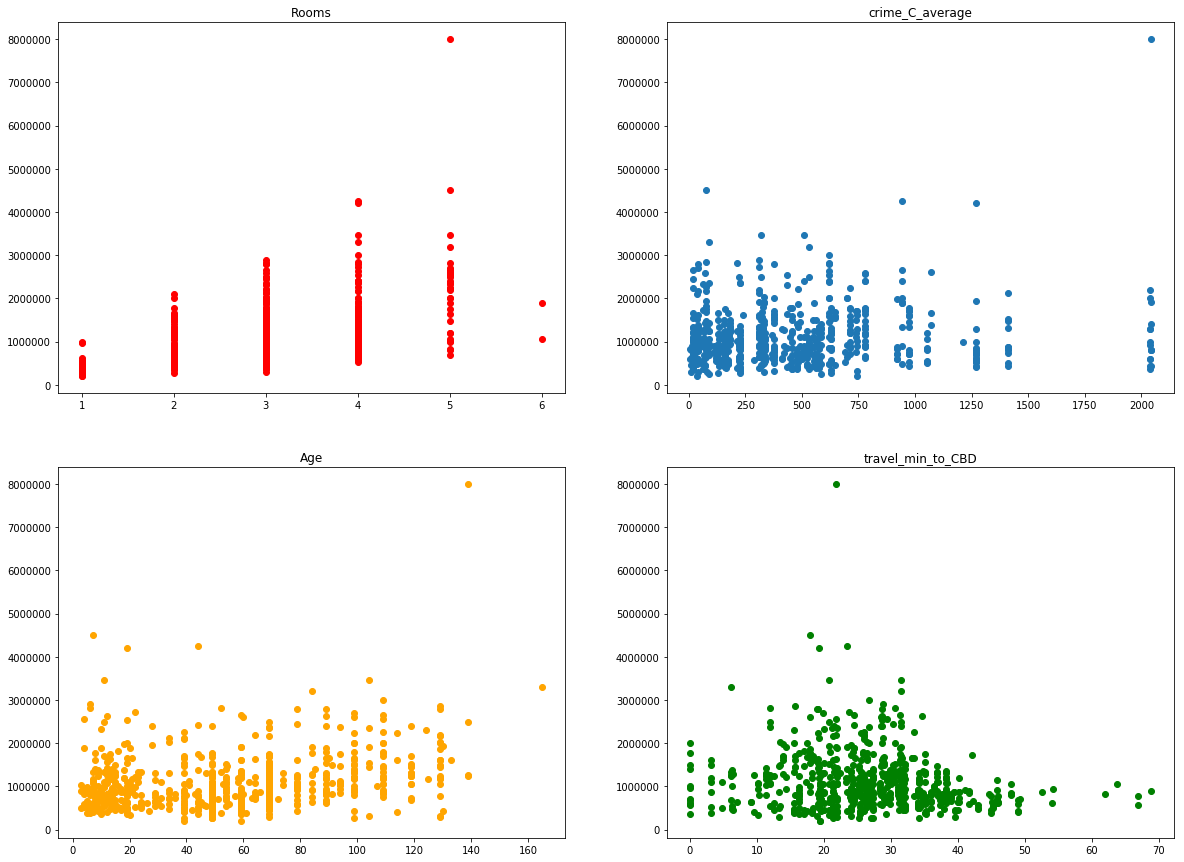

In [62]:
visualize_features(df_feature)

From the scatter plots, we cannot see any clear linear relationships for crime_C_average and travel min to CBD. Homoscedasticity seems to present for the Room and Age attribute (may be we can fix this by applying some transformation methods).

## 2. Standardization and transformation

### 2.1 Z-score normalization.

In [63]:
from sklearn.preprocessing import StandardScaler
# create copy
scaled_feature_normal = df_feature.copy()
# get independent variables
cols = ['Rooms','crime_C_average','travel_min_to_CBD','Age']
# get features values
features = scaled_feature_normal[cols]
# fit data into scaler
scaler = StandardScaler().fit(features.values)
# transform features
features_standardized = scaler.transform(features.values)
features_standardized 

array([[-1.04067851,  0.17073094, -0.66636218,  0.83784948],
       [-1.04067851, -1.00957447, -0.03199506, -0.43508603],
       [ 0.04296379, -0.27744535,  0.73607275,  0.6964122 ],
       ...,
       [ 0.04296379, -0.69730724,  1.16297328, -0.29364875],
       [ 0.04296379, -0.89955286, -0.23112376, -1.45343443],
       [ 1.12660609, -0.28553517,  1.0262317 ,  0.41353764]])

In [64]:
df_feature_norm = pd.DataFrame(features_standardized, columns = ['Rooms','crime_C_average','travel_min_to_CBD','Age'])
df_feature_norm.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age
0,-1.040679,0.170731,-0.666362,0.837849
1,-1.040679,-1.009574,-0.031995,-0.435086
2,0.042964,-0.277445,0.736073,0.696412
3,1.126606,-0.965889,0.969534,-1.227135
4,-2.124321,0.170731,-0.472923,-1.057410


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204F081CEB8>,
      dtype=object)

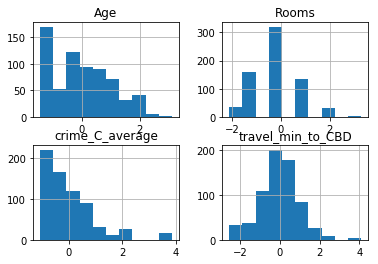

In [65]:
df_feature_norm.hist()

The 4 variables are standardized, most of them are between -3 to 3 except for crime_C_average which has some positive outliers.

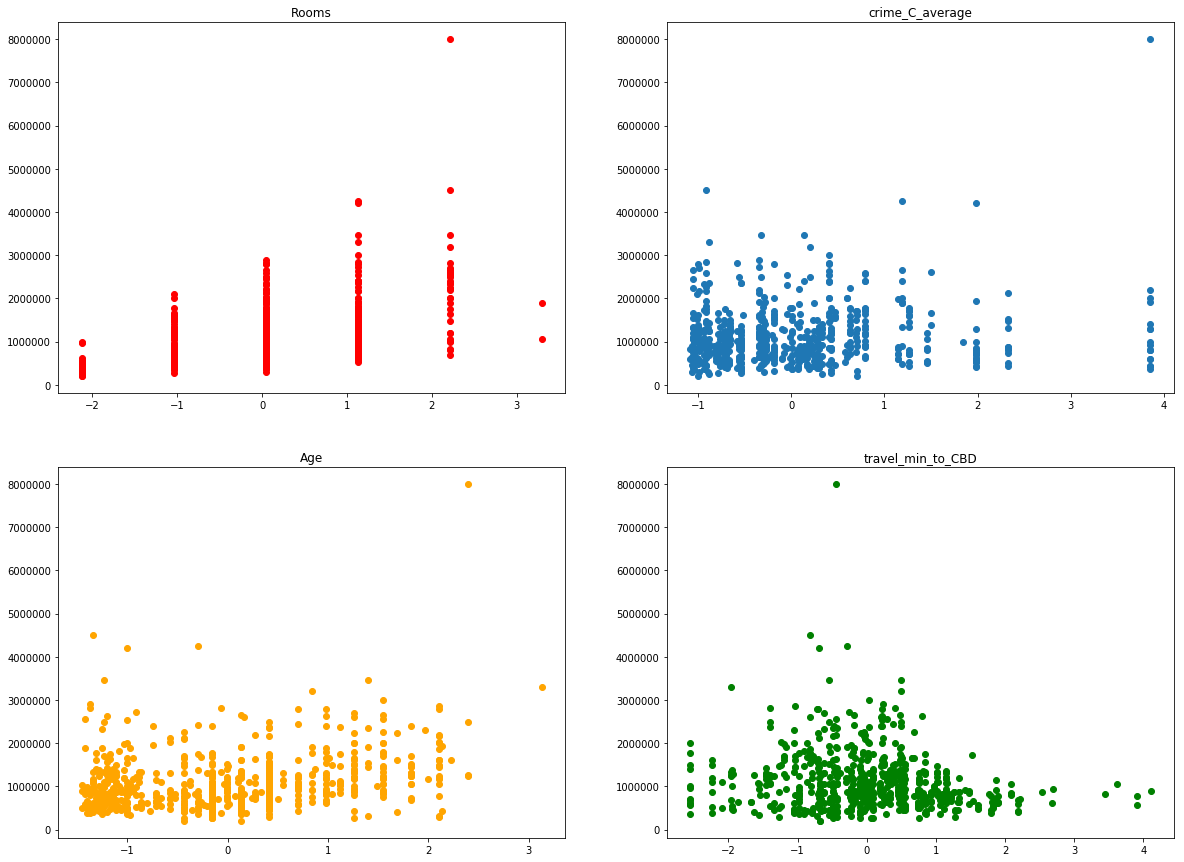

In [66]:
visualize_features(df_feature_norm)

### 2.2 Min-max normalization

In [67]:
# import library
from sklearn.preprocessing import MinMaxScaler
# fit data into scaler
scaler = MinMaxScaler().fit(features.values)
# transform features
features_min_max = scaler.transform(features.values)
features_min_max

array([[0.2       , 0.25413189, 0.28335535, 0.5       ],
       [0.2       , 0.0153821 , 0.3786619 , 0.22222222],
       [0.4       , 0.1634757 , 0.49405548, 0.4691358 ],
       ...,
       [0.4       , 0.07854688, 0.5581925 , 0.25308642],
       [0.4       , 0.03763705, 0.34874505, 0.        ],
       [0.6       , 0.16183931, 0.53764861, 0.40740741]])

In [68]:
df_feature_min_max = pd.DataFrame(features_min_max, columns = ['Rooms','crime_C_average','travel_min_to_CBD','Age'])
df_feature_min_max.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age
0,0.2,0.254132,0.283355,0.500000
1,0.2,0.015382,0.378662,0.222222
2,0.4,0.163476,0.494055,0.469136
3,0.6,0.024219,0.529130,0.049383
4,0.0,0.254132,0.312417,0.086420


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204F137DCF8>,
      dtype=object)

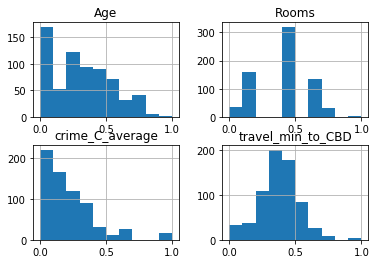

In [69]:
df_feature_min_max.hist()

The pattern for min max is basically the same as standard normalization except the ranges are bounded from 0 to 1.

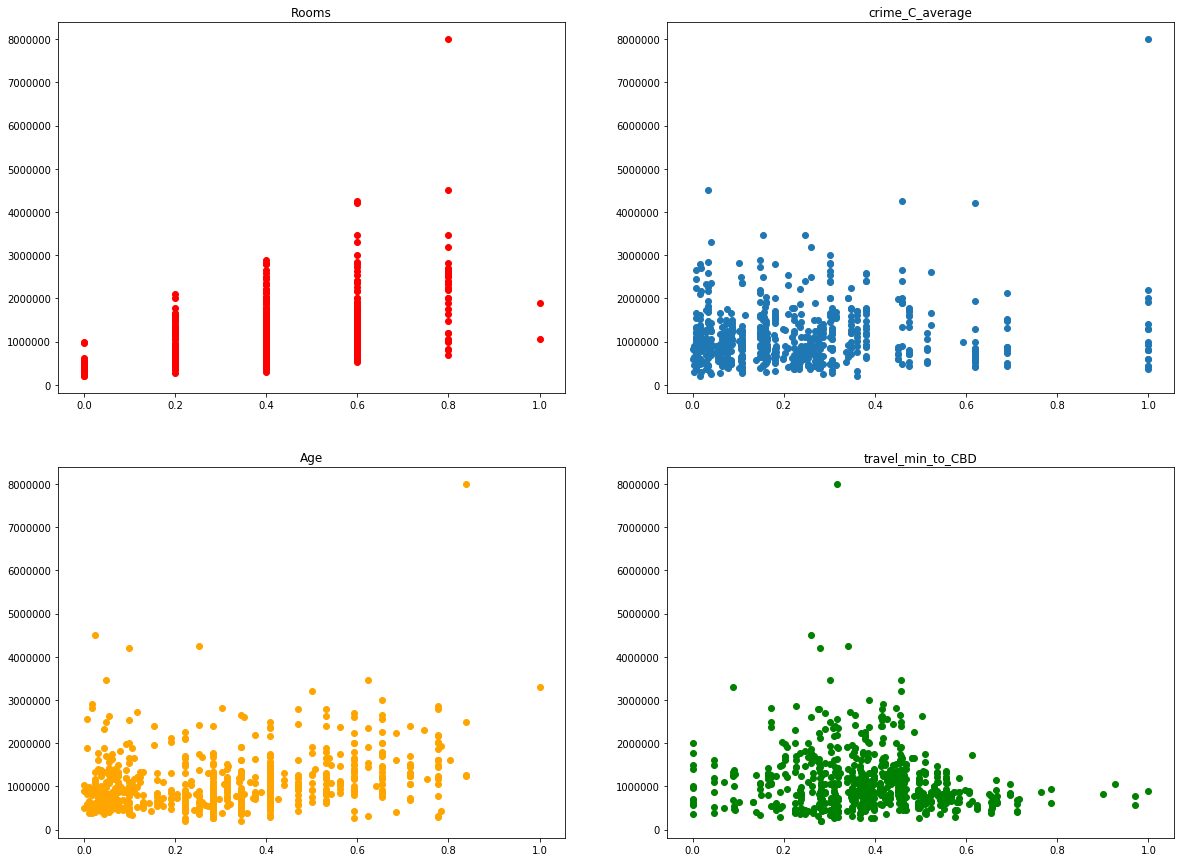

In [70]:
visualize_features(df_feature_min_max)

It is important to note that standardization of predictors **DOES NOT** affect model performance for linear regression model. The value of coefficients are not the same when we run regression analysis with and without standardizing independent variables. It does not mean they are affected by scaling / standardization. The values are different because of these are the slopes - how much the target variable changes if we change independent variable by 1 unit. In other words, standardization can be interpreted as scaling the corresponding slopes. The r-squared and the predictions for both models will be the same!

If we want to fit the data into a model that use distance as measure, such as k-nearest neighbors, it is absolutely crucial to standardize the predictors to make all variables to contribute equally.

### 2.3 Log transformation

In [71]:
np.log(features)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,Rooms,crime_C_average,travel_min_to_CBD,Age
0,0.693147,6.259581,2.970414,4.430817
1,0.693147,3.601868,3.260356,3.663562
2,1.098612,5.824032,3.526361,4.369448
3,1.386294,4.001254,3.594948,2.397895
4,0.000000,6.259581,3.068053,2.833213
5,1.098612,5.429346,2.965273,2.302585
6,1.098612,6.659294,3.157000,3.988984
7,1.098612,2.944439,3.688879,3.784190
8,1.386294,7.145722,2.791800,4.077537
9,1.098612,6.183461,2.885067,4.859812


We cannot use log transformation for travel min in this case, because travel minutes to CBD column has 0s.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


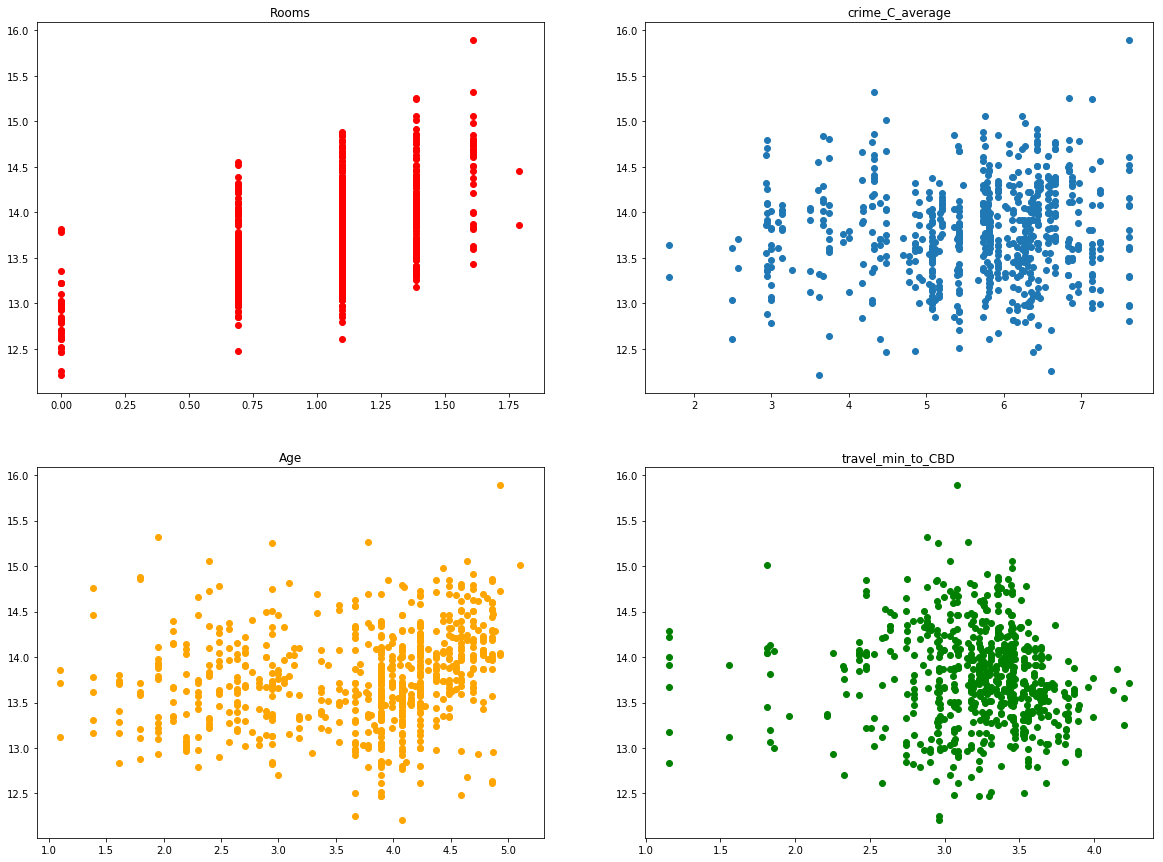

In [72]:
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.scatter(np.log(df['Rooms']), np.log(df_feature['Price']), color = 'Red')
ax1.title.set_text('Rooms')

ax2.scatter(np.log(df['crime_C_average']), np.log(df_feature['Price']))
ax2.title.set_text('crime_C_average')
    
ax3.scatter(np.log(df['Age']), np.log(df_feature['Price']), color = 'Orange')
ax3.title.set_text('Age')

ax4.scatter(np.log(df['travel_min_to_CBD']), np.log(df_feature['Price']), color = 'green')
ax4.title.set_text('travel_min_to_CBD')

After log transformation, we can see the log of rooms has a linear relationship we the log of price. We cannot observe any linear relationship for the other 3 variables.

### 2.4 Power transformation

In [73]:
# import library
from sklearn.preprocessing import PowerTransformer
# fit data into scaler
scaler = PowerTransformer().fit(df_feature)
# transform features
features_power = scaler.transform(df_feature)
features_power

array([[-1.04028233,  0.48234151, -0.65715975,  0.87433812,  0.53552348],
       [-1.04028233, -1.58664757, -0.02153049, -0.25721175,  1.46668314],
       [ 0.06173998,  0.02418302,  0.7381321 ,  0.76716206, -0.87384423],
       ...,
       [ 0.06173998, -0.61357999,  1.15659547, -0.10664013, -0.31368422],
       [ 0.06173998, -1.1209915 , -0.22014852, -1.97499065, -0.08834097],
       [ 1.12028658,  0.01442697,  1.02281798,  0.54198674, -0.36242341]])

In [74]:
df_feature_power = pd.DataFrame(features_power, columns = ['Rooms','crime_C_average','travel_min_to_CBD','Age', 'Price'])
df_feature_power.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price
0,-1.040282,0.482342,-0.657160,0.874338,0.535523
1,-1.040282,-1.586648,-0.021530,-0.257212,1.466683
2,0.061740,0.024183,0.738132,0.767162,-0.873844
3,1.120287,-1.369681,0.967279,-1.388034,0.063490
4,-2.203645,0.482342,-0.462410,-1.078575,-1.276648


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204F14D1E80>,
      dtype=object)

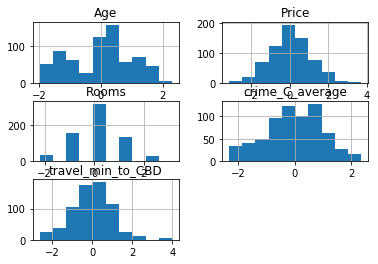

In [75]:
df_feature_power.hist()

The pattern is more normal for power transformation, the variables are bounded between -2 to 2.

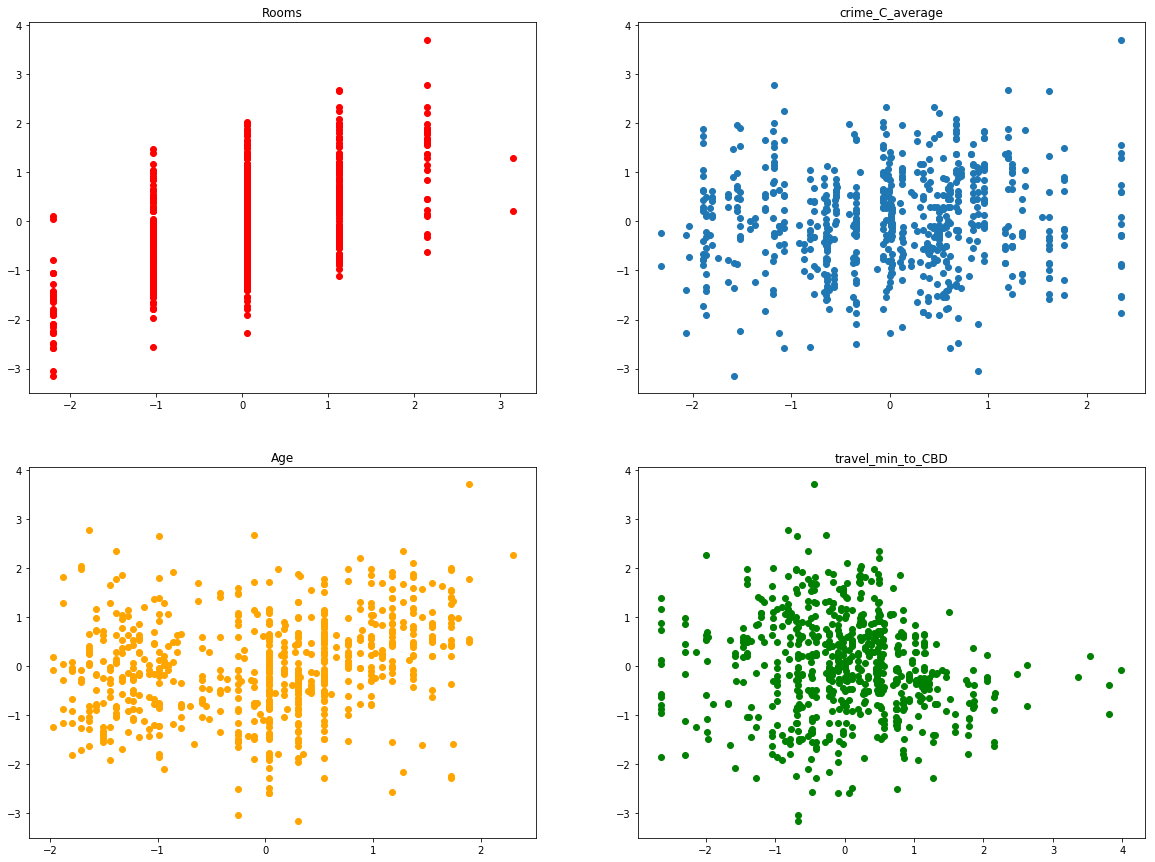

In [76]:
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.scatter(df_feature_power['Rooms'], df_feature_power['Price'], color = 'Red')
ax1.title.set_text('Rooms')

ax2.scatter(df_feature_power['crime_C_average'], df_feature_power['Price'])
ax2.title.set_text('crime_C_average')
    
ax3.scatter(df_feature_power['Age'], df_feature_power['Price'], color = 'Orange')
ax3.title.set_text('Age')

ax4.scatter(df_feature_power['travel_min_to_CBD'], df_feature_power['Price'], color = 'green')
ax4.title.set_text('travel_min_to_CBD')

The effect of power transformation is very similar to log transformation.

### 2.5 Root transformation

In [77]:
df_root = np.sqrt(features)
df_root.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age
0,1.414214,22.869193,4.415880,9.165151
1,1.414214,6.055301,5.104784,6.244998
2,1.732051,18.393840,5.830952,8.888194
3,2.000000,7.393691,6.034384,3.316625
4,1.000000,22.869193,4.636809,4.123106


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204F1932A90>,
      dtype=object)

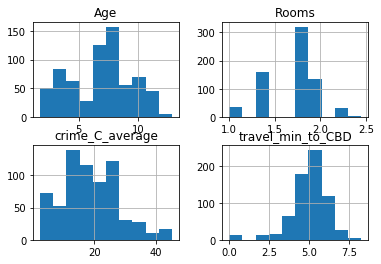

In [78]:
df_root.hist()

After root transformation, the range for crime_C_average is still much larger than the other 3 variables.

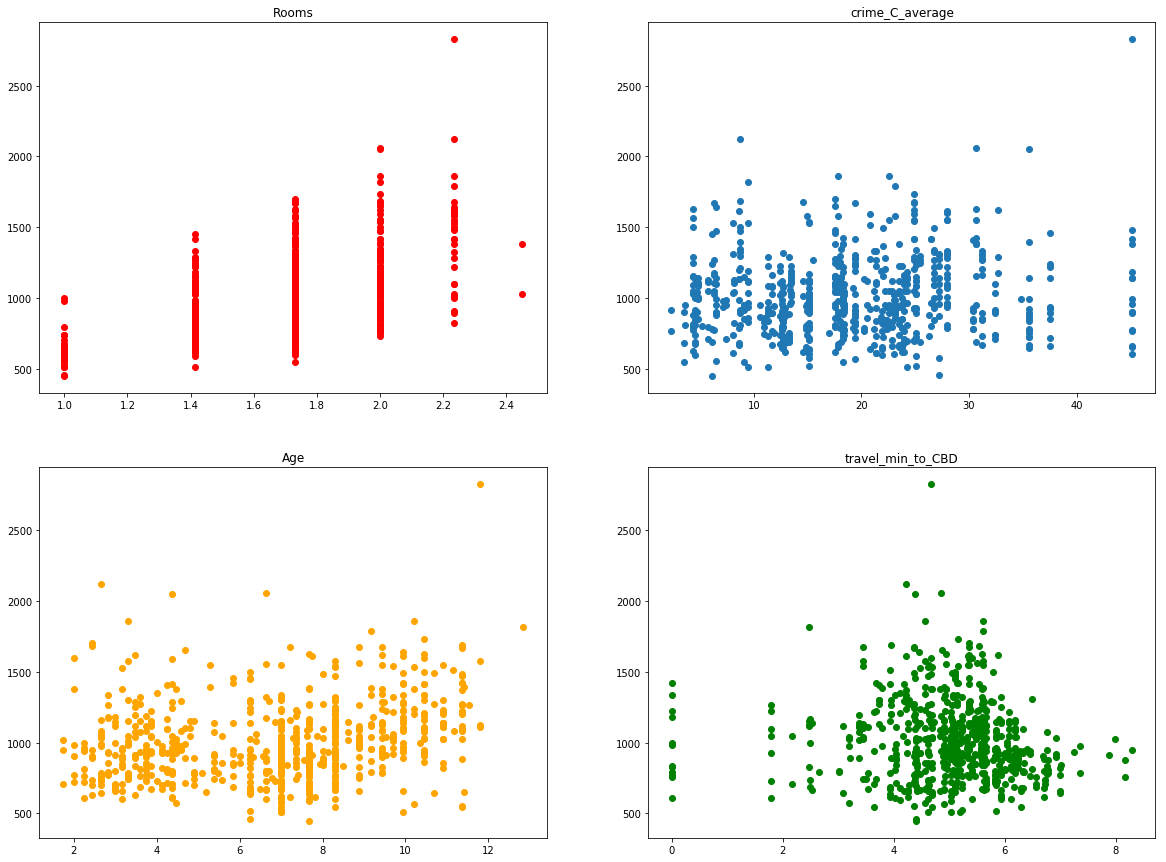

In [79]:
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.scatter(np.sqrt(df['Rooms']), np.sqrt(df_feature['Price']), color = 'Red')
ax1.title.set_text('Rooms')

ax2.scatter(np.sqrt(df['crime_C_average']), np.sqrt(df_feature['Price']))
ax2.title.set_text('crime_C_average')
    
ax3.scatter(np.sqrt(df['Age']), np.sqrt(df_feature['Price']), color = 'Orange')
ax3.title.set_text('Age')

ax4.scatter(np.sqrt(df['travel_min_to_CBD']), np.sqrt(df_feature['Price']), color = 'green')
ax4.title.set_text('travel_min_to_CBD')

Homoscedadiscity still exists for room attribute after applying root transformation.

After apply different transformation methods, it seems like using log or power transformation on room attribute could make it more linear to the target variable.

Further, we cannot observe any linear relationship for the 3 other variable with the target variable(price), therefore, including them in the linear model is not a good idea.

### 3. Run linear regression
#### 3.0 Original

In [80]:
# import library
from sklearn import linear_model
from sklearn.metrics import r2_score

# fit data to model
regr = linear_model.LinearRegression()
regr.fit(np.array(df_feature['Rooms']).reshape(-1,1), df_feature['Price'])

# make prediction
price_pred = regr.predict(np.array(df_feature['Rooms']).reshape(-1,1))

# print out performance measure
print('Original:',r2_score(df_feature['Price'],price_pred))
print(regr.coef_)

Original: 0.26404256877252796
[372514.12460879]


The R2 for the model using room attribute without any transformation is 0.264.

#### 3.1 Power transformation

In [81]:
# fit data to model
regr_power = linear_model.LinearRegression()
regr_power.fit(np.array(df_feature_power['Rooms']).reshape(-1,1), df_feature_power['Price'])
# make prediction
price_pred_power = regr_power.predict(np.array(df_feature_power['Rooms']).reshape(-1,1))
# print out performance measure
print('Power:',r2_score(df_feature_power['Price'],price_pred_power))
print(regr_power.coef_)

Power: 0.35003399550274095
[0.59163671]


The R2 for the model using room attribute after applying power transformation is 0.35.

#### 3.2 log transformation

In [82]:
# fit data to model
regr_log = linear_model.LinearRegression()
regr_log.fit(np.array(np.log(df_feature['Rooms'])).reshape(-1,1), np.log(df_feature['Price']))
# make prediction
price_pred_log = regr_log.predict(np.array(np.log(df_feature['Rooms'])).reshape(-1,1))
# print out performance measure
print('Log:',r2_score(np.log(df_feature['Price']),price_pred_log))
print(regr_log.coef_)

Log: 0.35615660463768706
[0.88607759]


The R2 for the model using room attribute after applying log transformation is 0.356.

Log transformation perform best in this case, we should build a linear model using log transformation on room attribute. Note that adding other variables will improves the R2 no matter that feature is important or not, but this will overfit the model and if we use this model to predict the price of new observation, the performance is likely to be poor.